# UNIDAD 3 - PROYECTO: ML

## Nombre del alumno: Samanta Gabriela Ortiz Garcia
## Número de control: 20120140

# PRESENTACIÓN DEL PROYECTO:
## El proyecto busca que el estudiante pueda utilizar técnicas de Machine Learning para realizar predicciones de un dataset de la vida real.
## En esta ocasión, el dataset es pequeño, por lo que se debe tener especial cuidado cuando se traten los datos y se seleccione el modelo.

# PARTE I: EDA.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as amano
import numpy as np

## Paso 1. Carga y muestra.
### - Cargue el dataset llamado "cirrhosis.csv" en un dataframe, posteriormente muestre su información.

In [29]:
df = pd.read_csv('cirrhosis.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

## Paso 2. Análisis estadístico.
### - De las columnas numéricas, muestre la información estadística relevante (promedio, cuartíles, desviación estándar y coeficiente de variación).
### - A través del coeficiente de variación determine qué columnas presentan mucha dispersión en sus datos.


In [30]:
columnas_numericas = df.select_dtypes(include=[np.number])

estadisticas_relevantes = columnas_numericas.describe()

coef_variacion = columnas_numericas.apply(lambda x: np.std(x) / np.mean(x) * 100)

print("Información estadística relevante:")
print(estadisticas_relevantes)

print("\nCoeficiente de variación:")
print(coef_variacion)

columnas_dispersion_alta = coef_variacion[coef_variacion > 30].index
print("\nColumnas con mucha dispersión:")
print(columnas_dispersion_alta)

Información estadística relevante:
               ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   284.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   231.944545   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%    105.250000  1092.750000  15644.500000    0.800000   249.500000   
50%    209.500000  1730.000000  18628.000000    1.400000   309.500000   
75%    313.750000  2613.500000  21272.500000    3.400000   400.000000   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  310.000000    312.000000  312.000000     282.000000   
mean     3.497440   97.648387   1982.655769  122.556346     124.702128   
std      0.424972   85.613920   2140.388824   56.699525      65.148639   
min      1.

## Paso 3. Búsqueda de nulos y datos atípicos.
### - Muestre cuántos datos nulos tienen las columnas, puede apoyarse de un gráfico para mostrar la cantidad de nulos que hay.
### - Muestre las distribuciones de las columnas numéricas y mencione si presentan datos atípicos/anomalías/outliers.


Cantidad de datos nulos por columna:
ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


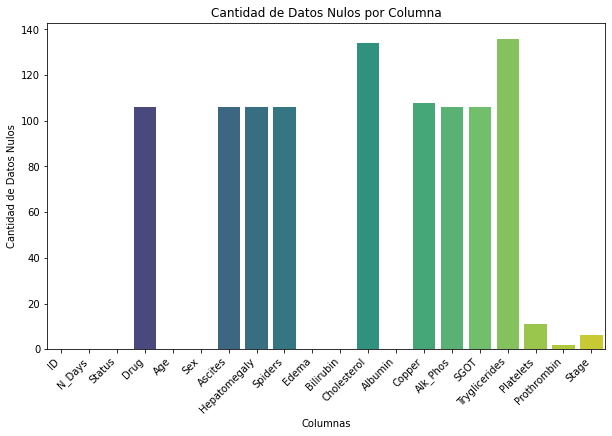

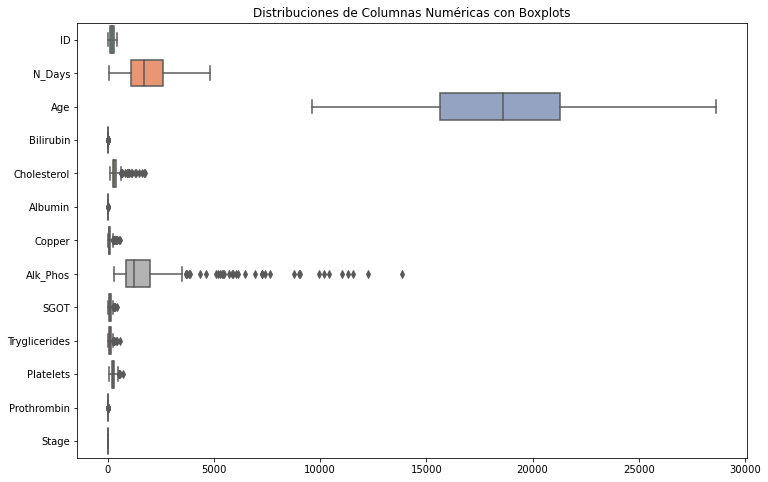

In [31]:
datos_nulos = df.isnull().sum()
print("Cantidad de datos nulos por columna:")
print(datos_nulos)

plt.figure(figsize=(10, 6))
sns.barplot(x=datos_nulos.index, y=datos_nulos.values, palette="viridis")
plt.title("Cantidad de Datos Nulos por Columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de Datos Nulos")
plt.xticks(rotation=45, ha="right")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient="h", palette="Set2")
plt.title("Distribuciones de Columnas Numéricas con Boxplots")
plt.show()

## Paso 4. Análisis de categorización.
### - Revise las columnas que son de tipo objeto, analice la cantidad de posibilidades que tienen.
### - Determine si una (o algunas) puede ser categorizable, aún no la(s) categorice.

In [6]:
columnas_objeto = df.select_dtypes(include=['object']).columns

for columna in columnas_objeto:
    unique_values = df[columna].unique()
    print(f"{columna}: {len(unique_values)} posibilidades únicas")
    print(unique_values)
    print()
    
umbral_categorizacion = 10

columnas_categorizables = [columna for columna in columnas_objeto if len(df[columna].unique()) < umbral_categorizacion]

print('\nColumnas categorizables:')
print(columnas_categorizables)

Status: 3 posibilidades únicas
['D' 'C' 'CL']

Drug: 3 posibilidades únicas
['D-penicillamine' 'Placebo' nan]

Sex: 2 posibilidades únicas
['F' 'M']

Ascites: 3 posibilidades únicas
['Y' 'N' nan]

Hepatomegaly: 3 posibilidades únicas
['Y' 'N' nan]

Spiders: 3 posibilidades únicas
['Y' 'N' nan]

Edema: 3 posibilidades únicas
['Y' 'N' 'S']


Columnas categorizables:
['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


## Paso 5. Correlación y análisis del problema.
### - Muestre la correlación de los datos numéricos con respecto a la columna "Status", para ello tendrá que volver numérica dicha columna (para este paso puede usar un encoder).
### - El objetivo es predecir con estos datos la variable "Status".
### - ¿Con los datos que se tienen se puede predecir correctamente esa variable?
Hay algunos valores que no ayudan
### - Si tuviera que seleccionar un modelo para hacer las predicciones, ¿cuál sería?
RandomForest

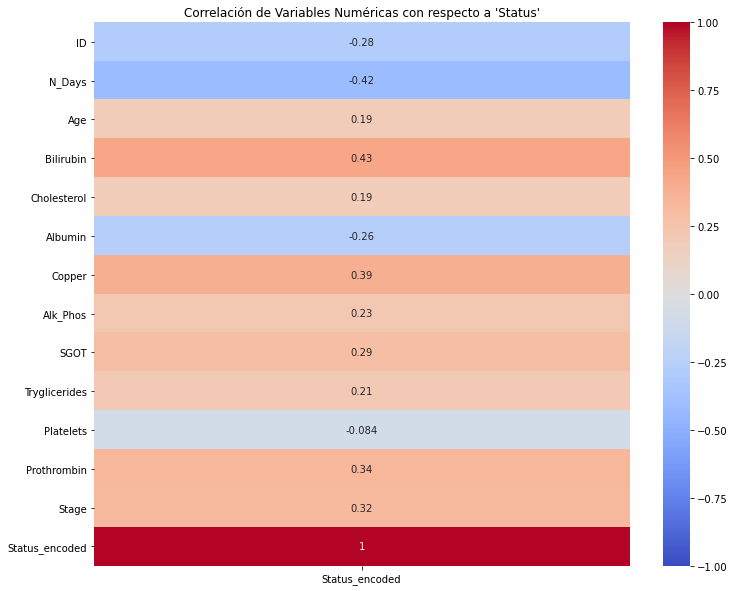

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Status_encoded'] = le.fit_transform(df['Status'])

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['Status_encoded']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlación de Variables Numéricas con respecto a 'Status'")
plt.show()

# PARTE II: MANIPULACIÓN Y TRATAMIENTO.

## Paso 1. Tratamiento de datos nulos.
### - Trate los datos nulos acorde a lo que se ha visto previamente en el curso.
### - Muestre la cantidad de datos nulos antes y después del tratamiento.

In [34]:
print("Cantidad de datos nulos antes del tratamiento:")
print(df.isnull().sum())

df_tratado = df.fillna(df.mean())

print("\nCantidad de datos nulos después del tratamiento:")
print(df_tratado.isnull().sum())

Cantidad de datos nulos antes del tratamiento:
ID                  0
N_Days              0
Status              0
Drug              106
Age                 0
Sex                 0
Ascites           106
Hepatomegaly      106
Spiders           106
Edema               0
Bilirubin           0
Cholesterol       134
Albumin             0
Copper            108
Alk_Phos          106
SGOT              106
Tryglicerides     136
Platelets          11
Prothrombin         2
Stage               6
Status_encoded      0
dtype: int64

Cantidad de datos nulos después del tratamiento:
ID                  0
N_Days              0
Status              0
Drug              106
Age                 0
Sex                 0
Ascites           106
Hepatomegaly      106
Spiders           106
Edema               0
Bilirubin           0
Cholesterol         0
Albumin             0
Copper              0
Alk_Phos            0
SGOT                0
Tryglicerides       0
Platelets           0
Prothrombin         0
Stage     

## Paso 2. Tratamiento de anomalías.
### - Enfrente los datos extremos y las anomalías.
### - Es libre de utilizar los métodos que prefiera, trate de no perder muchos datos (se tiene un dataset pequeño).
### - Muestre las distribuciones tratadas antes y después del tratamiento.

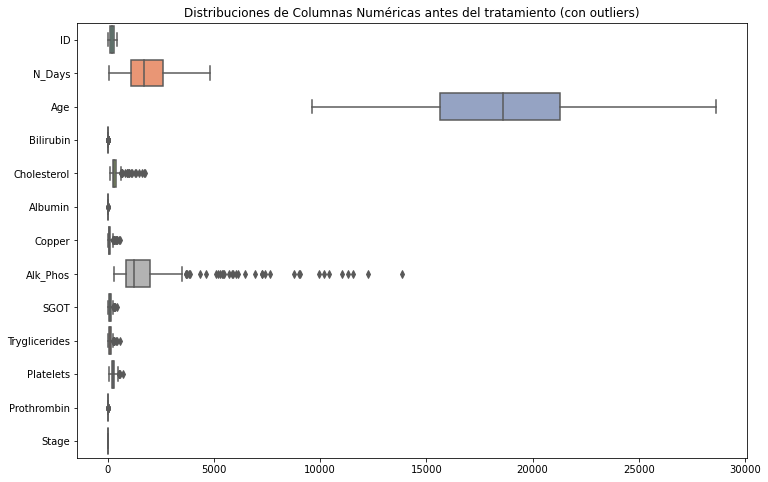

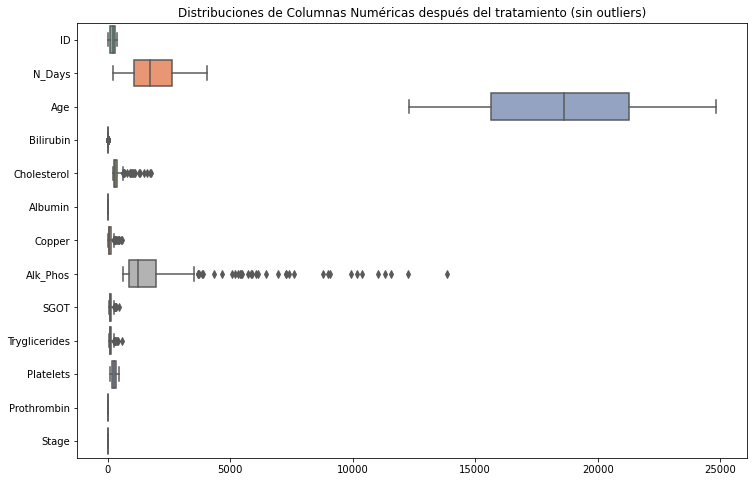

In [36]:
from scipy.stats import mstats

df = pd.read_csv('cirrhosis.csv')

plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient="h", palette="Set2")
plt.title("Distribuciones de Columnas Numéricas antes del tratamiento (con outliers)")
plt.show()

df_tratado = df.copy()

porcentaje_winsorizing = 0.05

for columna in df_tratado.select_dtypes(include=[np.number]).columns:
    df_tratado[columna] = mstats.winsorize(df_tratado[columna], limits=[porcentaje_winsorizing, porcentaje_winsorizing])

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_tratado.select_dtypes(include=[np.number]), orient="h", palette="Set2")
plt.title("Distribuciones de Columnas Numéricas después del tratamiento (sin outliers)")
plt.show()

## Paso 3. Categorización.
### - Seleccione las columnas de tipo objeto candidatas a la categorización.
### - Realice la categorización.
### - Muestre la información del dataframe para demostrar que se realizó con éxito.

In [37]:
columnas_objeto = df.select_dtypes(include='object')

print("Información del DataFrame antes de la categorización:")
print(df.info())

for columna in columnas_objeto.columns:
    df[columna] = df[columna].astype('category')

print("\nInformación del DataFrame después de la categorización:")
print(df.info())

Información del DataFrame antes de la categorización:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  

## Paso 4. Tratamiento de incosistencias.
### - En la categorización anterior, ¿hay inconsistencias?
### - Revise las posibles opciones de cada columna categorizada, si encuentra alguna inconsistencia hay que tratarla.
### - Puede emplear gráficas de conteos para validar si una categoría se podría considerar como inconsistente.

Columna: Status
C     232
D     161
CL     25
Name: Status, dtype: int64




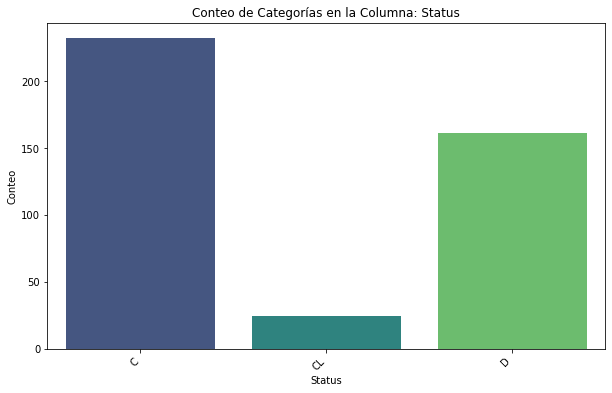

Columna: Drug
D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64




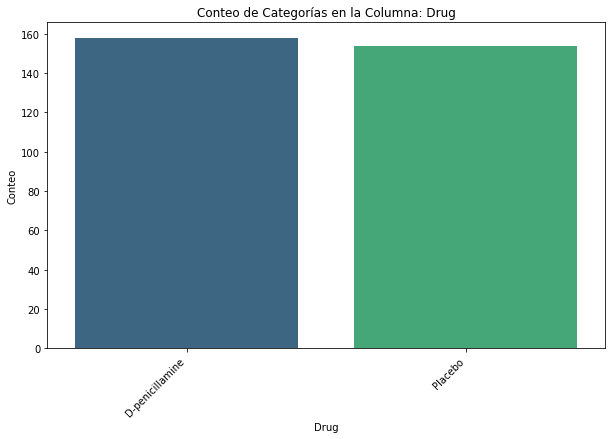

Columna: Sex
F    374
M     44
Name: Sex, dtype: int64




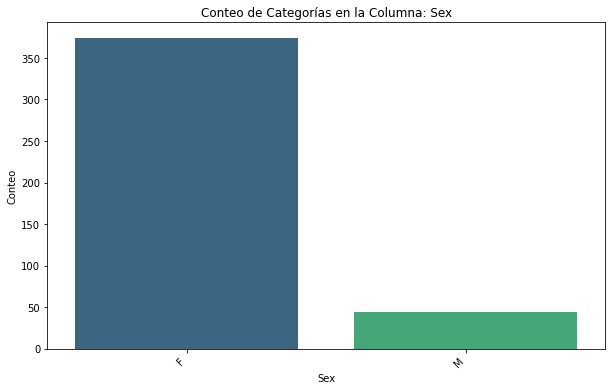

Columna: Ascites
N    288
Y     24
Name: Ascites, dtype: int64




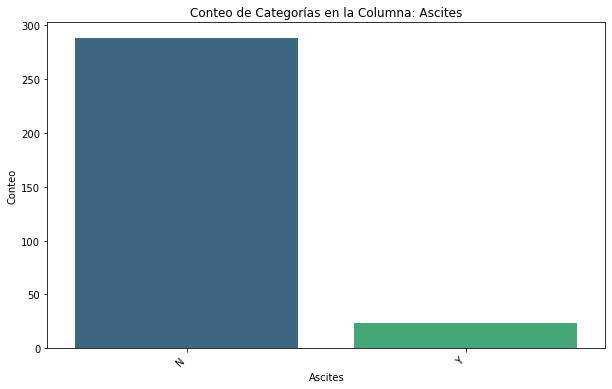

Columna: Hepatomegaly
Y    160
N    152
Name: Hepatomegaly, dtype: int64




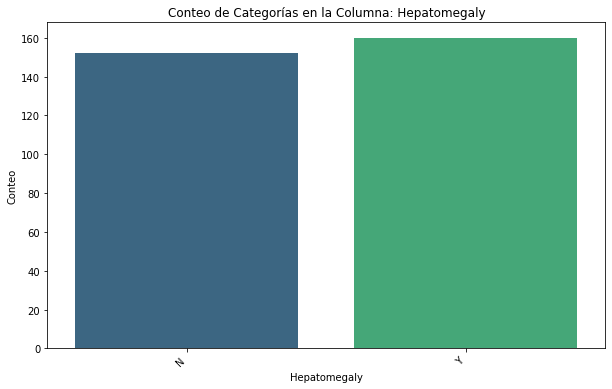

Columna: Spiders
N    222
Y     90
Name: Spiders, dtype: int64




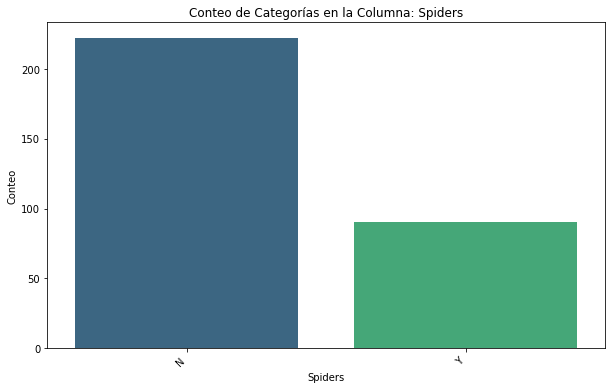

Columna: Edema
N    354
S     44
Y     20
Name: Edema, dtype: int64




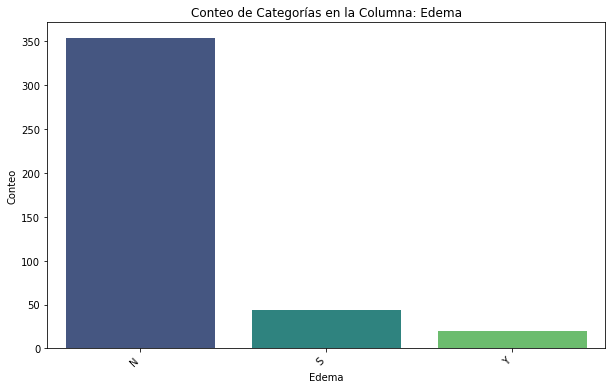

In [38]:
columnas_objeto = df.select_dtypes(include='category')

for columna in columnas_objeto.columns:
    print(f"Columna: {columna}")
    print(df[columna].value_counts())
    print("\n")

    plt.figure(figsize=(10, 6))
    sns.countplot(x=columna, data=df, palette="viridis")
    plt.title(f"Conteo de Categorías en la Columna: {columna}")
    plt.xlabel(columna)
    plt.ylabel("Conteo")
    plt.xticks(rotation=45, ha="right")
    plt.show()

## Paso 5. Conversión a numérico.
### - Ya que tiene un dataframe sin datos nulos, sin inconsistencias y sin anomalías, hay que convertirlo a numérico.
### - Emplee un tipo de encoding adecuado a cada columna.
### - Construya un nuevo dataframe completamente numérico (incluyendo "Status", este debe ser forzosamente mediante LabelEncoding).
### - Muestre la información del nuevo dataframe.

In [39]:
columnas_categoricas = df.select_dtypes(include='category').columns

df_numeric = df.copy()

label_encoder = LabelEncoder()
df_numeric['Status'] = label_encoder.fit_transform(df['Status'])

df_numeric = pd.get_dummies(df_numeric, columns=columnas_categoricas)

print("Información del nuevo dataframe numérico:")
print(df_numeric.info())

Información del nuevo dataframe numérico:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    418 non-null    int64  
 1   N_Days                418 non-null    int64  
 2   Age                   418 non-null    int64  
 3   Bilirubin             418 non-null    float64
 4   Cholesterol           284 non-null    float64
 5   Albumin               418 non-null    float64
 6   Copper                310 non-null    float64
 7   Alk_Phos              312 non-null    float64
 8   SGOT                  312 non-null    float64
 9   Tryglicerides         282 non-null    float64
 10  Platelets             407 non-null    float64
 11  Prothrombin           416 non-null    float64
 12  Stage                 412 non-null    float64
 13  Status_0              418 non-null    uint8  
 14  Status_1              418 non-nu

# PARTE III: MACHINE LEARNING.

## Paso 1. División de los datos.
### - Divide las columnas en la variable "X" y la variable "y".
### - Muestree los datos en dos: entrenamiento y pruebas. La proporción de cada muestra queda a decisión suya.
### - Utilice una semilla para que los resultados puedan ser reproducibles.


In [40]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Status'])

y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (334, 19)
Dimensiones de X_test: (84, 19)
Dimensiones de y_train: (334,)
Dimensiones de y_test: (84,)


## Paso 2. Abordaje mediante modelo simple.
### - Importe un modelo simple de ML, puede ser KNN, Regresión Logística o un árbol de decisión.
### - Entrene el modelo con los datos y realice las predicciones con la muestra de pruebas.
### - Muestre los resultados con f1_score, accuracy_score y classification_report.
### - Analizando el reporte de clasificación, ¿qué tal se desempeñó su modelo?

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split



X = df.drop(columns=['Status'])

y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

modelo_logistico = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', LogisticRegression(random_state=42))])

modelo_logistico.fit(X_train, y_train)

predicciones = modelo_logistico.predict(X_test)

f1 = f1_score(y_test, predicciones, average='weighted')  
accuracy = accuracy_score(y_test, predicciones)
reporte_clasificacion = classification_report(y_test, predicciones)

print(f"F1 Score: {f1}")
print(f"Accuracy Score: {accuracy}")
print("Classification Report:")
print(reporte_clasificacion)

F1 Score: 0.8126293995859213
Accuracy Score: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           C       0.83      0.91      0.87        44
          CL       0.00      0.00      0.00         4
           D       0.83      0.83      0.83        36

    accuracy                           0.83        84
   macro avg       0.56      0.58      0.57        84
weighted avg       0.79      0.83      0.81        84



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Paso 3. Mejorando el modelo.
### - Emplee GridSearchCV para encontrar los mejores hiperparámetros para su modelo.
### - Valide con varias opciones.
### - Si su modelo no logra mejorar mucho, no se preocupe, es parte del aprendizaje.

In [47]:
from sklearn.model_selection import GridSearchCV

X = df.drop(columns=['Status'])

y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

modelo_logistico = LogisticRegression(random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', modelo_logistico)])

param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=make_scorer(f1_score, average='weighted'))

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

mejor_modelo = grid_search.best_estimator_
predicciones_mejor_modelo = mejor_modelo.predict(X_test)

f1_mejor_modelo = f1_score(y_test, predicciones_mejor_modelo, average='weighted')
accuracy_mejor_modelo = accuracy_score(y_test, predicciones_mejor_modelo)
reporte_clasificacion_mejor_modelo = classification_report(y_test, predicciones_mejor_modelo)

print("\nRendimiento del modelo con mejores hiperparámetros:")
print(f"F1 Score: {f1_mejor_modelo}")
print(f"Accuracy Score: {accuracy_mejor_modelo}")
print("Classification Report:")
print(reporte_clasificacion_mejor_modelo)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on 

Mejores hiperparámetros encontrados:
{'classifier__C': 0.1, 'classifier__penalty': 'l2'}

Rendimiento del modelo con mejores hiperparámetros:
F1 Score: 0.8126293995859213
Accuracy Score: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           C       0.83      0.91      0.87        44
          CL       0.00      0.00      0.00         4
           D       0.83      0.83      0.83        36

    accuracy                           0.83        84
   macro avg       0.56      0.58      0.57        84
weighted avg       0.79      0.83      0.81        84



D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

## Paso 4. Ensambles.
### - Utilice el ensamble de VotingClassifier para mejorar el rendimiento.
### - Seleccione al menos 4 modelos simples diferentes y úselos dentro del ensamble (Stacking).
### - Entrene el meta-modelo y valide su rendimiento con f1_score, accuracy_score y classification_report.
### - Analizando el classification_report, ¿qué tal se desempeñó el modelo?


In [49]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC



X = df.drop(columns=['Status'])

y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

logistic_model = LogisticRegression(random_state=42)
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

voting_model = VotingClassifier(
    estimators=[
        ('logistic', logistic_model),
        ('knn', knn_model),
        ('tree', tree_model),
        ('svm', svm_model)
    ],
    voting='soft'
)

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', voting_model)])

model_pipeline.fit(X_train, y_train)

predicciones = model_pipeline.predict(X_test)

f1 = f1_score(y_test, predicciones, average='weighted')
accuracy = accuracy_score(y_test, predicciones)
reporte_clasificacion = classification_report(y_test, predicciones)

print("Rendimiento del modelo:")
print(f"F1 Score: {f1}")
print(f"Accuracy Score: {accuracy}")
print("Classification Report:")
print(reporte_clasificacion)

Rendimiento del modelo:
F1 Score: 0.824484061274668
Accuracy Score: 0.8452380952380952
Classification Report:
              precision    recall  f1-score   support

           C       0.85      0.91      0.88        44
          CL       0.00      0.00      0.00         4
           D       0.84      0.86      0.85        36

    accuracy                           0.85        84
   macro avg       0.56      0.59      0.58        84
weighted avg       0.80      0.85      0.82        84



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Paso 5. Modelo supremo.
### - Con los resultados del paso 4 y 5, determine qué camino seguirá: tomar un modelo y mejorarlo o usar el meta-modelo y mejorarlo.
### - Mejore su modelo hasta el máximo, para eso se recomienda utilizar una Pipeline (puede ser con Pipeline o make_pipeline).
### - Dependiendo del modelo que haya seleccionado, debe buscar mejores hiperparámetros, escalar, normalizar, estandarizar o hacer cambios importantes en los datos (como seleccionar únicamente las variables de mayor correlación), también puede emplear PCA para reducir dimensionalidad.
### - El objetivo es que el modelo generado en este paso sea superior a los modelos del paso 4 y 5.
### - Para este paso también puede utilizar las SVM, RandomForest y Redes Neuronales Artificiales (SKLearn).

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

X = df.drop(columns=['Status'])

y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'pca__n_components': [5, 10, 15], 
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='f1_weighted')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
predicciones = best_model.predict(X_test)

f1 = f1_score(y_test, predicciones, average='weighted')
accuracy = accuracy_score(y_test, predicciones)
reporte_clasificacion = classification_report(y_test, predicciones)

print("Mejor rendimiento del modelo:")
print(f"F1 Score: {f1}")
print(f"Accuracy Score: {accuracy}")
print("Classification Report:")
print(reporte_clasificacion)

print("Mejores hiperparámetros:")
print(grid_search.best_params_)

# PARTE IV. PRESENTACIÓN.
## - Emplee PCA con las columnas de la variable X (con los datos completos) y reduzca su dimensionalidad a 2.
## - Muestre un gráfico de dispersión entre esas dos características PCA y colorice con la columna "Status". Para esto puede construir un nuevo dataframe con las 2 columnas obtenidas por PCA y añadiendo la columna "Status" antes de la transformación.
## - Analice si los grupos se pueden separar dentro de ese gráfico.
## - Suba este proyecto a su propio repositorio en GitHub.
## - Documente en un README el proceso realizado en este proyecto.
## - Brinde el enlace al entregar el proyecto en Teams.


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_preprocessed = preprocessor.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

pca_df = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])

pca_df['Status'] = y.values

plt.figure(figsize=(10, 6))
status_labels = ['Cirrhosis', 'No Cirrhosis']
colors = ['red', 'blue']

for status, color in zip(status_labels, colors):
    subset = pca_df[pca_df['Status'] == status]
    plt.scatter(subset['Componente 1'], subset['Componente 2'], label=status, color=color)

plt.title('PCA de Datos con Reducción a 2 Dimensiones')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Componente 1', y='Componente 2', hue='Status', data=pca_df, palette='viridis')
plt.title('Gráfico de Dispersión PCA con Colores según la Columna "Status"')
plt.show()